In [ ]:
import pandas as pd
from textblob import TextBlob

# Load the dataset
data = pd.read_csv('/content/Airline_review.csv')

# Preview the data
data.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,Nov-19,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,Jun-19,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,Jun-19,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,Sep-19,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,Sep-19,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
# Function to calculate sentiment
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to your reviews column
data['sentiment'] = data['Review'].apply(calculate_sentiment)

# View the sentiment scores
print(data[['Review', 'sentiment']].head())

                                              Review  sentiment
0    Moroni to Moheli. Turned out to be a pretty ...   0.302222
1   Moroni to Anjouan. It is a very small airline...  -0.077083
2    Anjouan to Dzaoudzi. A very small airline an...   0.070833
3    Please do a favor yourself and do not fly wi...  -0.206250
4   Do not book a flight with this airline! My fr...   0.175000


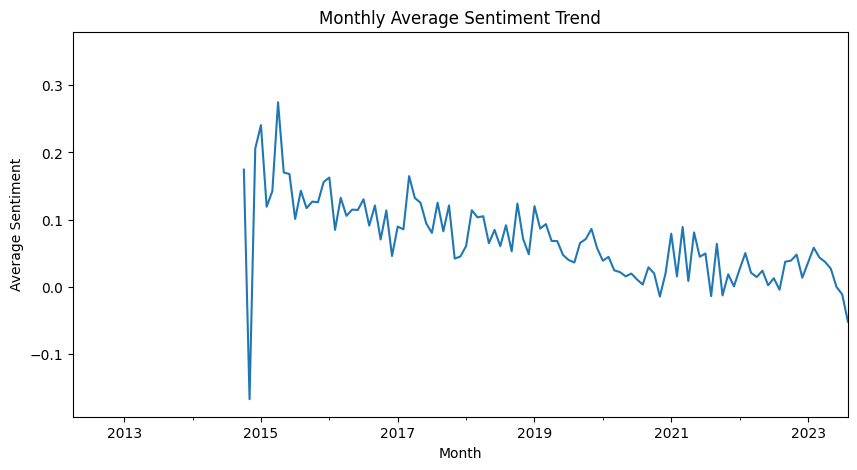

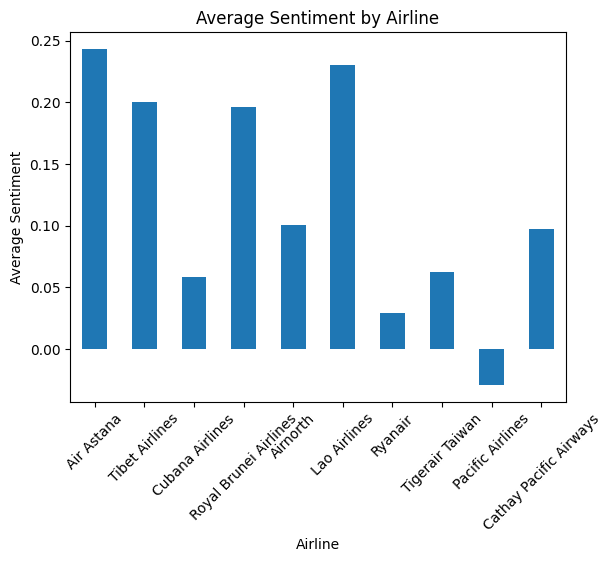

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Assume there's a 'date' column in your dataset; convert it to datetime format
data['Date Flown'] = pd.to_datetime(data['Date Flown'], format='%b-%y', errors='coerce')

# Set date as index
data.set_index('Date Flown', inplace=True)

# Resample data by month and calculate average sentiment
monthly_sentiment = data['sentiment'].resample('M').mean()

plt.figure(figsize=(10, 5))
monthly_sentiment.plot(title='Monthly Average Sentiment Trend')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.show()
print()

# Airline-specific sentiment trend
airline_sentiment = data.groupby('Airline Name')['sentiment'].mean().sort_values()

airlines = airline_sentiment.sample(n=10, random_state=np.random.RandomState())

# Plotting
airlines.plot(kind='bar', title='Average Sentiment by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.show()